# Baz Fonksiyonları ve Varyasyonel Formlar

## 4d. Baz Fonksiyonları ve Türevleri

### Baz Fonksiyonları

Herhangi bir fonksiyonu başka fonksiyonların toplamı cinsinden yazmak matematikte sıkça kullanılan bir yöntemdir. Buradan hareketle, bu bölümde yaklaşık çözümde kullandığımız baz fonksiyonlarından bahsedeceğiz.

En sade ifade ile baz fonksiyonları, genel çözümü toplam olarak elde ederken kullandığımız parçalı fonksiyonlardır. Yerel baz fonksiyonları ise eleman bazında çözüme yakınsarken kullandığımız fonksiyonlardır. 
Sonlu elemanlar yönteminin en önemli avantajlarından birisi de çözüme yakınsarken kullandığımız bu baz fonksiyonlarınınn basit olmalarıdır. Basit fonksiyonları kullanmamıza olanak sağlayan ise problem geometrisini (problem domain) parçalardan oluşan bir ağa (mesh) dönüştürmemizdir.  

Problem çözümüne yakınsamaya çalışırken kullandığımız baz fonksiyonları, problem ağının büyük bölümünde 0 değerini taşır. Küçük bir aralıkta (belirli elemanlarda) ise sıfırdan farklı, basit parçalı fonksiyonlarla tanımlanırlar. Burada bu fonksiyonlar parçalı olarak tanımlanırken dikkat edilmesi gereken nokta, bu fonksiyonların düğüm noktalarında (node) sürekli olmasıdır. Yani parçalı olarak ifade edilen fonksiyonlar düğüm noktalarında tek bir değere sahip olmalıdır. Bu gereklilik fiziksel bir bakış açısı örneklendirilecek olursa; bir plaka üzerinde bir nokta hem 5 °C hem 10 °C olamaz.  

Son olarak baz fonksiyonları seçerken elde edilen varyasyonel formdaki terimler dikkate alınmalıdır. Çünkü baz fonksiyonları hem test (test) hem de deneme (trial) fonksiyonlarının yakınsanmasında kullanılır.  Bu fonksiyonların kendileri ve derecesi çözmeye çalıştığımız diferansiyel denkleme göre değişen türevleri varyasyonel formda integral içerisinde görülür. Baz fonksiyonlarıyla yazılan bu integrallerin anlamlı olması gerekmektedir. Şimdiye kadar dediklerimizi özetleyecek olursak;

1. Baz fonksiyonları eleman bazında belirli aralıklarda parçalı olarak tanımlanır.
2. Düğüm noktalarında sürekliliği sağlamak ve gerçek sonuca yakınsamak için düğüm noktalarında tek bir değer almalılardır.
3. Varyasyonel formda integrale girdiklerinde integraller anlamlı olmalıdır.

Bu derste konseptin daha iyi anlaşılması için 1 boyutlu baz fonksiyonlarını ele alalım. Yukarıda sayılan özellikleri sağlayan ve en çok kullanılan baz fonksiyonları lineer parçalı polinom (şapka) fonksiyonlardır. 

Öncelikle parçalanmış geometriyi yani mesh'i (ağ) oluşturmamız gerekiyor. Burada işleri çok kolaylaştıracağı için bir boyutlu mesh sınıfı oluşturalım;

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TekBoyutluMesh:
    def __init__(self, uzunluk, eleman_sayısı):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS)

Şimdi de tek boyutlu, uzunluğu 1m olan ve birden fazla elemandan oluşan ilk meshimizi oluşturabiliriz;

In [2]:
uzunluk = 1
eleman_sayısı = 2
mesh = TekBoyutluMesh(uzunluk, eleman_sayısı)

Oluşturduğumuz meshi nokta numaralarıyla birlikte görüntüleyelim;

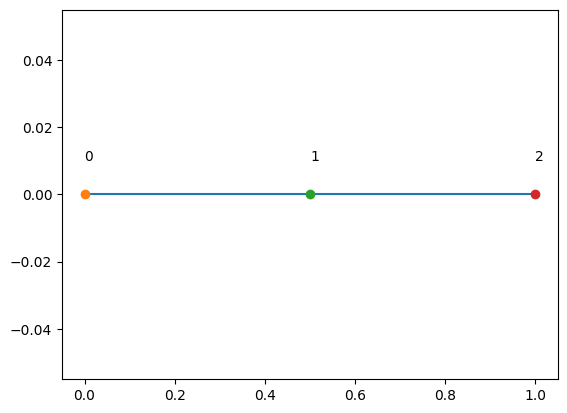

In [3]:
plt.plot([0,mesh.L],[0,0]) # Düz bir çizgi çizelim.
for numara,nokta in enumerate(mesh.koordinatlar): 
    plt.plot(nokta,0, "o-")
    plt.text(nokta,0.01,str(numara))

Geometrimizi eşit uzunluktaki elemanlara ayırdığımız için her bir elemanın uzunluğu ($h_i$) aynı olacaktır. Şimdi de birinci dereceden parçalı bir fonksiyon tanımlayalım;

$$ v(x)=   \left\{
\begin{array}{ll}
      \frac{x-x_{i-1}}{h_i} & x_{i-1}\leq x \leq x_i \\
      \frac{x_{i+1}-x}{h_{i+1}} & x_{i}\leq x \leq x_{i+1} \\
      0 & \textit{diğer tüm durumlar} \\
\end{array} 
\right.  $$

Bu ifadeyi şimdi herhangi bir noktanın yerel baz fonksiyonunu tanımlamak için programlayabiliriz;

In [4]:
def v(mesh, nokta):
    # Bu fonksiyonu cizdirebilmek icin baz fonksiyonlarına ait yeni mesh kullanalim:
    baz_mesh = TekBoyutluMesh(mesh.L, mesh.NS*100)
    
    v_dizi = np.zeros(baz_mesh.NS)
    for nokta_indisi, baz_nokta in enumerate(baz_mesh.koordinatlar):

        if  baz_nokta >= mesh.koordinatlar[nokta-1] and baz_nokta <= mesh.koordinatlar[nokta]:
            v_dizi[nokta_indisi] = (baz_nokta-mesh.koordinatlar[nokta-1])/(mesh.h)

        elif  baz_nokta >= mesh.koordinatlar[nokta] and baz_nokta <= mesh.koordinatlar[nokta+1]: 
            v_dizi[nokta_indisi] = ((mesh.koordinatlar[nokta+1])-baz_nokta)/(mesh.h)

        else:
            v_dizi[nokta_indisi] = 0
        
    return v_dizi, baz_mesh

Bu fonksiyon ile 1 noktasına ait bir şekil fonksiyonu çizdirelim;

Text(1.0, 1.01, '2')

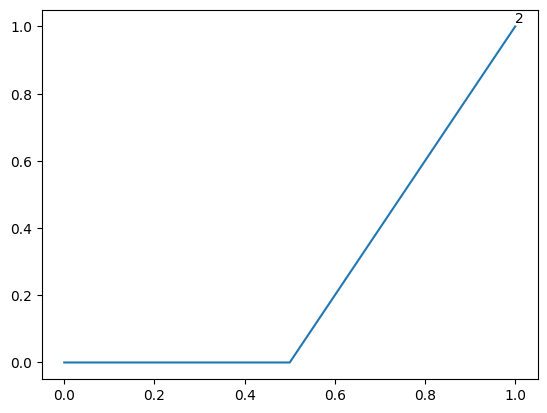

In [5]:
nokta = 2
baz_fonksiyonu, baz_mesh = v(mesh, nokta)
plt.plot(baz_mesh.koordinatlar, baz_fonksiyonu)
plt.text(mesh.koordinatlar[nokta],1.01,str(nokta))

Görüldüğü üzere 1 noktası için çizilen şekil fonksiyonu, 1 noktası hariç tüm noktalarda 0 değerini alır. Bu şekilde tüm noktalar için maksimum değeri 1 olan ayrı ayrı şekil fonksiyonları elde edilebilir;

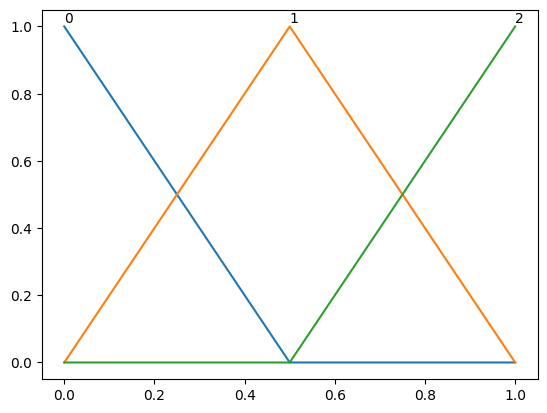

In [6]:
for nokta in range(mesh.NS):
    baz_fonksiyonu, baz_mesh = v(mesh, nokta)
    plt.plot(baz_mesh.koordinatlar, baz_fonksiyonu)
    plt.text(mesh.koordinatlar[nokta],1.01,str(nokta))

### Baz Fonksiyonlarının Türevleri

Eksenel yüke maruz kalan çubuk probleminde görüldüğü üzere, denklemin varyasyonel (weak) formunda baz fonksiyonlarının birinci dereceden türevinin yer aldığı görülmektedir. Bu yüzden her bir nokta için türettiğimiz baz fonksiyonlarının türevlerine ihtiyacımız vardır. Yukarıdaki 1 boyutlu baz fonksiyonlarının türevi aşağıdaki şekilde koşullu fonksiyon olarak yazılabilir;

$$ \frac{dv}{dx}=   \left\{
\begin{array}{ll}
      \frac{1}{h_i} & x_{i-1}\leq x \leq x_i \\
      \frac{-1}{h_{i+1}} & x_{i}\leq x \leq x_{i+1} \\
      0 & \textit{diğer tüm durumlar} \\
\end{array} 
\right.  $$

Yukarıdaki koşullu fonksiyonu aynı şekilde Python fonksiyonu olarak tanımlayabiliriz; 

In [7]:
uzunluk = 1
eleman_sayisi = 2
mesh = TekBoyutluMesh(uzunluk, eleman_sayisi)

def dv_dx(mesh, nokta):
    # Bu fonksiyonu cizdirebilmek icin şekil fonksiyonlarına ait yeni mesh kullanalim:
    baz_mesh = TekBoyutluMesh(mesh.L, mesh.NS*100)
    
    dv_dizi = np.zeros(baz_mesh.NS)
    for nokta_indisi, baz_nokta in enumerate(baz_mesh.koordinatlar):

        if  baz_nokta >= mesh.koordinatlar[nokta-1] and baz_nokta <= mesh.koordinatlar[nokta]:
            dv_dizi[nokta_indisi] = (1)/(mesh.h)

        elif  baz_nokta >= mesh.koordinatlar[nokta] and baz_nokta <= mesh.koordinatlar[nokta+1]: 
            dv_dizi[nokta_indisi] = (-1)/(mesh.h)

        else:
            dv_dizi[nokta_indisi] = 0
        
    return dv_dizi, baz_mesh

Şimdi herhangi bir nokta için bu türev fonksiyonunu kullanıp türev değerlerine bakalım;

Text(0.01, 0.04, '0')

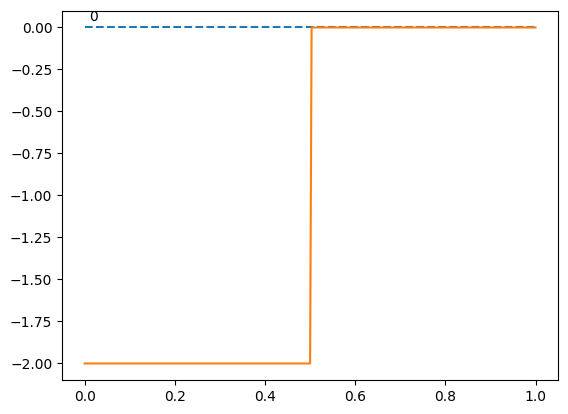

In [8]:
nokta = 0
dv, baz_mesh = dv_dx(mesh, nokta)
plt.plot([0,mesh.L],[0,0],'--') # Düz bir çizgi çizelim.
plt.plot(baz_mesh.koordinatlar, dv)
plt.text(mesh.koordinatlar[nokta]+0.01,0.04,str(nokta))

Türevleri daha iyi yorumlamak amacıyla bu 3 nokta için türevlerin aldığı değerleri tek bir grafikte gösterelim;

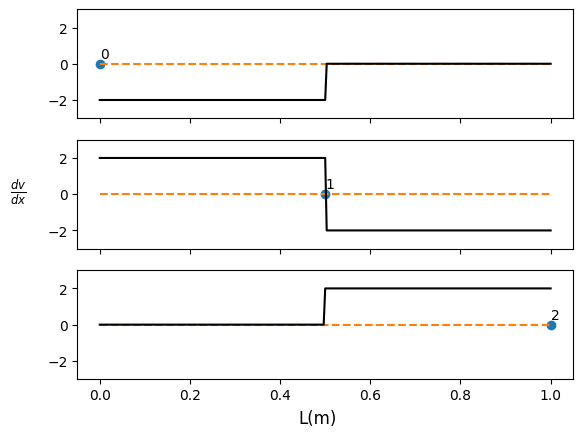

In [9]:
fig, ax = plt.subplots(3, 1, sharex=True)
fig.supxlabel('L(m)') # x ekseninin başlığı
fig.supylabel(r'$\frac{dv}{dx}$', rotation=0) # y ekseninin başlığı
for nokta in range(mesh.NS):
    dv, baz_mesh = dv_dx(mesh, nokta)
    ax[nokta].plot(mesh.koordinatlar[nokta],0, "o-") # Noktayi gösterelim.
    ax[nokta].text(mesh.koordinatlar[nokta],0.3,str(nokta))
    ax[nokta].plot([0,mesh.L],[0,0],'--') # Düz bir çizgi çizelim.
    ax[nokta].plot(baz_mesh.koordinatlar, dv, '-k') # Türevin aldığı değerleri gösterelim
    ax[nokta].set_ylim(-3,3) # y ekseninin minimum ve maksimum değerlerini değiştirelim.


Yukarıdaki grafikte görüldüğü üzere 1. eleman (0. ve 1. nokta arasındaki eleman) için integral işlemi yaparken 0. baz fonksiyonunun türevi -2 değerini verirken, 1. baz fonksiyonunun türevi tam tersine +2 değerini vermektedir.